# K means clustering with standard squared euclidean distance : on all mnist data

In [1]:
import sklearn
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

##First let's visualise out dataset

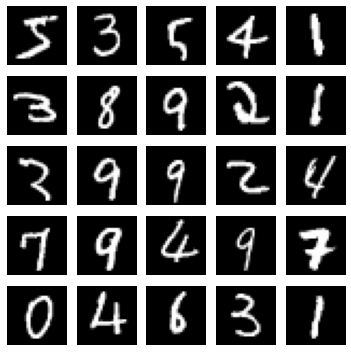

In [2]:

import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(5, 5))
for i in range(25):
    ax = axs[i // 5][i % 5]
    ax.imshow(X[50*i:50*i+1].values.reshape(28,28), cmap='gray')
    ax.axis('off')
    ax.axis('off')
plt.tight_layout()
plt.show()

##Parameters :

In [3]:
#Parameters
K=25 #numbers of clusters
X=X.values #convert to numpy array
y=y.values

##All fonctions

In [4]:
import random #CHANGE INDEX TO POINT CENTROIDS ARE NOT NEC IN THE EXISTING POINTS

def K_means_clustering_standard_SED(X,K):
    """
    Performs K-means-clustering with standard squared Euclidean distance
    Input : X : dataset (N : number samples x m : size of data/element)
            K : numbers of clusters  
    output : centroids : list with 
    centroids : list of element
    clusters : list of list of the indexes of each cluster 
    """
    
    N=len(X)
    random.seed(1000) #since we use random, we are going to set a seed,... not necessary
    centroids_index = random.sample(range(N), K)#Initialize centroids
    centroids=X[centroids_index]
    clusters = asign_clusters(centroids,X,K) #asign to cluster
    new_centroids=update_centroids(clusters,X,K) 

    number_it=1
    while loss(centroids,clusters,X,K)!= loss(new_centroids,asign_clusters(new_centroids,X,K),X,K): #while the centroids change, then (1) is improving by construction , we can also use > instead
        centroids=new_centroids.copy() #copy, python basic = to copy isn't enougth
        clusters = asign_clusters(centroids,X,K) #asign to cluster
        new_centroids=update_centroids(clusters, X,K)
        number_it +=1

    
    print("Iterations numbers " + str(number_it))

    return centroids



In [5]:
def loss(centroids,clusters,X,K):
    """
    Calculate loss : with squared euclidean distance
    Input : 
            centroids and clusters to compute loss from
            X : dataset 
            K : numbers of clusters  
    output : squared euclidean distance : L(X,k)=sum sum || Xi - Cl ||^2
    """
    loss=0
    for l in range(K):
        for i in clusters[l]:
            loss+=np.inner(X[i]-centroids[l],X[i]-centroids[l])
    return loss

In [6]:
def update_centroids(clusters, X,K):
    """
    update the new centroids computing the mean on clusters 
    """
    new_centroids=[]#placeholder
    for l in range(K):
        new_centroids.append(sommer(X[clusters[l]])/len(clusters[l]) ) #sommer is a function that compute the vector sum of a list of vectors
    return new_centroids

In [7]:
def asign_clusters(centroids,X,K): 
    """
    For each centroids, we asign each element of X in it's corresponding cluster
    We do the argmin of the standard squared euclidian norm 
    """
    clusters=[[] for i in range(K)] #placeholder
    for i in range(len(X)): 
        sed=[np.inner(X[i]-centroids[j],X[i]-centroids[j]) for j in range(K)] #for each element xi of X, sed is the distance from each centroids
        clusters[np.argmin(sed)].append(i)
    return clusters

In [8]:
def sommer(list_of_list):
    """
    Compute the vector sum of a list of vectors
    """
    Somme= [0]*len(list_of_list[0]) #placeholder, nul vector
    for i in range(len(list_of_list)):
        Somme=np.add(list_of_list[i],Somme)
    return Somme

In [14]:
def print_digit(X):
    """
    visualize a sample of the digits // or all if less than 25
    """
    fig, axs = plt.subplots(5, 5, figsize=(5, 5))
    for i in range(min(len(X),25)):
        ax = axs[i // 5][i % 5]
        ax.imshow(X[i].reshape(28,28), cmap='gray')
        mk= most_freq_digit(y[clusters[i]],K)
        ax.set_title('Number {}'.format(mk))
        ax.axis('off')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def print_digit_clusters(X,clusters,K):
    """
    visualize a sample of all clusters
    """
    for L in range(K):
        plt.figure(L)
        
        fig, axs = plt.subplots(5, 5, figsize=(5, 5))
        X_l=X[clusters[L]]
        for i in range(min(len(X_l),25)): #so if a clusters is too small, we do not enconter a problem trying to go beyond what is in the cluster
            ax = axs[i // 5][i % 5]
            ax.imshow(X_l[i].reshape(28,28), cmap='gray') 
            ax.axis('off')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
#Compute the accuracy of the clustering
def accuracy(cluster,y,K):
  """
  computes the accuracy of of the cluster
  input : clusters indexes, y : true labels 

  return accuracy : A =sum_k |{i ∈ Ck : i = mk}/number of elements
  """
  acc=0
  card=0
  
  for l in range(K):
    #find the mk : most frequent digit of cluster l
    mk= most_freq_digit(y[clusters[l]],K)
    print('The '+str(l+1)+'th cluster corresponds to the number '+str(mk))
    for element in y[cluster[l]]: 
      if int(element) == mk :
        acc+=1
      card +=1
  return acc/card #in fact card = len(y)


def most_freq_digit(liste,K):
  """
  find the most freq digit in liste, we suppose that liste contains int, from 0 to K-1
  """
  compteur=[0]*K #store how much time we see each element in the list
  for element in liste:
    element=int(element)
    compteur[element] += 1
  max_elem=max(compteur) 
  index=compteur.index(max_elem)
  return index



##Main

In [11]:
centroids=K_means_clustering_standard_SED(X,K)
clusters = asign_clusters(centroids,X,K) #cluster result

Iterations numbers 211


##centroids results

Here are what the centroids looks like : 


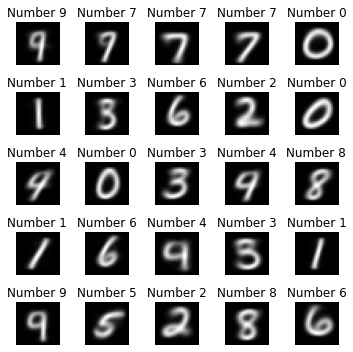

In [15]:
print("Here are what the centroids looks like : ")
print_digit(centroids)

## Clusters results

Here are what a sample of the clusters looks like : 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

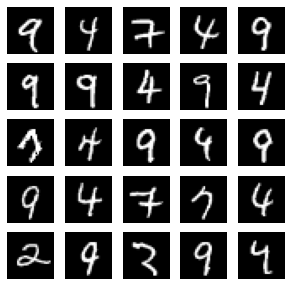

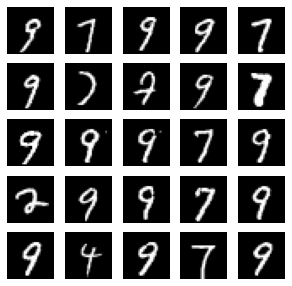

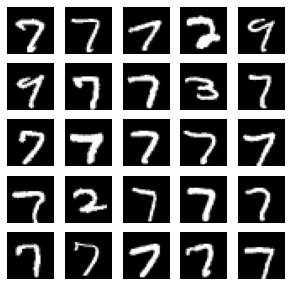

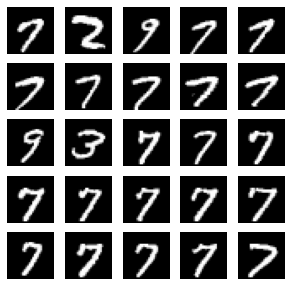

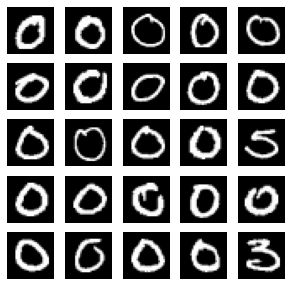

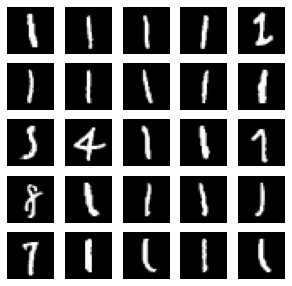

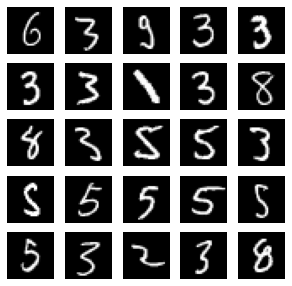

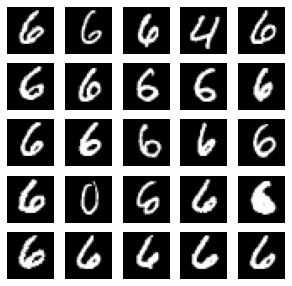

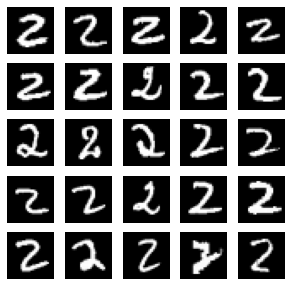

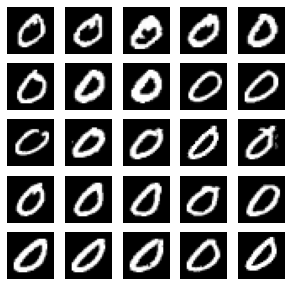

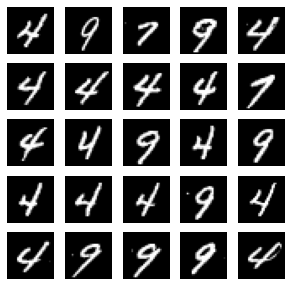

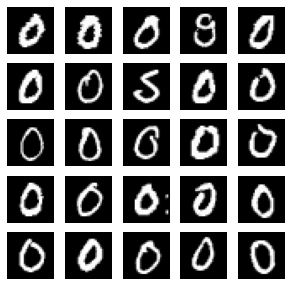

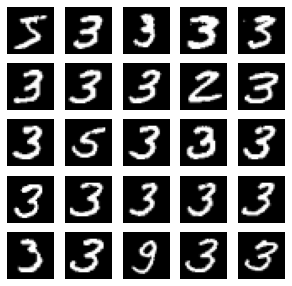

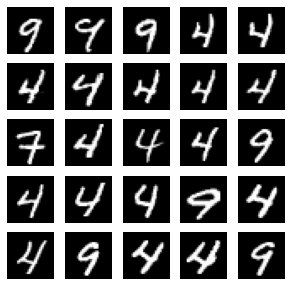

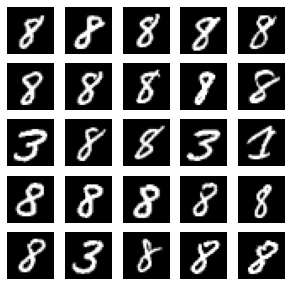

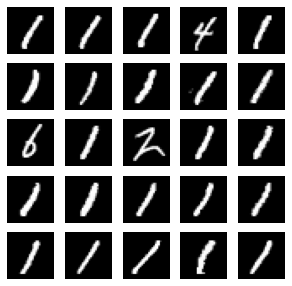

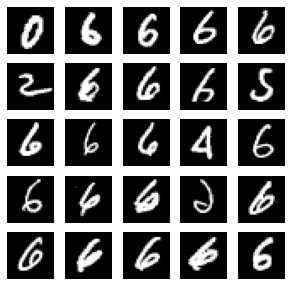

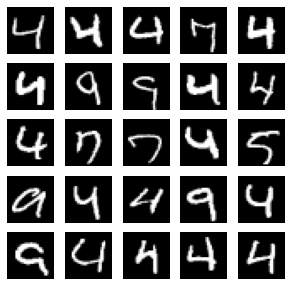

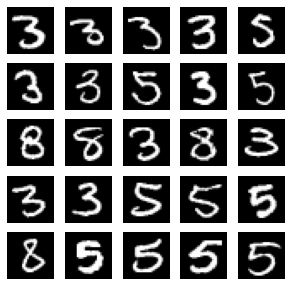

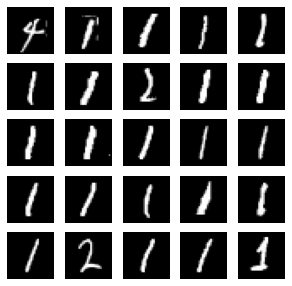

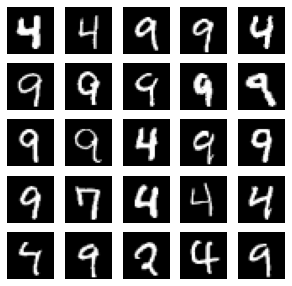

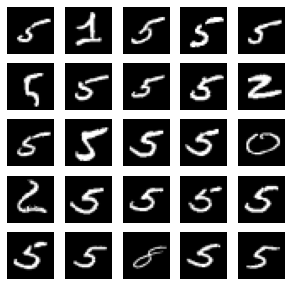

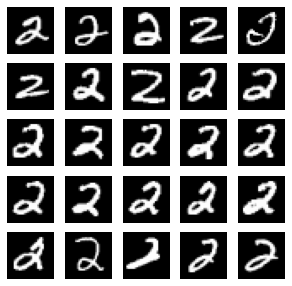

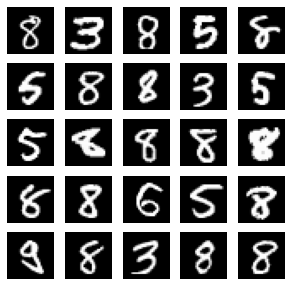

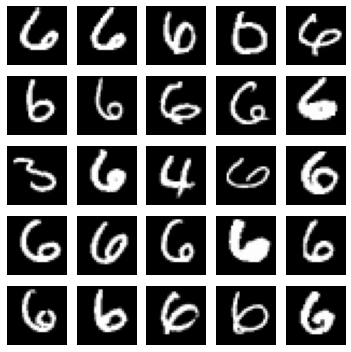

In [16]:
print("Here are what a sample of the clusters looks like : ")
print_digit_clusters(X,clusters,K)    

##Accuracy

In [17]:
print("Using the k-mean clustering without kernel on our dataset we were able to get an accuracy of " + str(accuracy(clusters,y,K)))

The 1th cluster corresponds to the number 9
The 2th cluster corresponds to the number 7
The 3th cluster corresponds to the number 7
The 4th cluster corresponds to the number 7
The 5th cluster corresponds to the number 0
The 6th cluster corresponds to the number 1
The 7th cluster corresponds to the number 3
The 8th cluster corresponds to the number 6
The 9th cluster corresponds to the number 2
The 10th cluster corresponds to the number 0
The 11th cluster corresponds to the number 4
The 12th cluster corresponds to the number 0
The 13th cluster corresponds to the number 3
The 14th cluster corresponds to the number 4
The 15th cluster corresponds to the number 8
The 16th cluster corresponds to the number 1
The 17th cluster corresponds to the number 6
The 18th cluster corresponds to the number 4
The 19th cluster corresponds to the number 3
The 20th cluster corresponds to the number 1
The 21th cluster corresponds to the number 9
The 22th cluster corresponds to the number 5
The 23th cluster co